In [1]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("tsla.us.txt")

In [4]:
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-06-28,17.00,17.00,17.00,17.00,0,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276,0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394,0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863,0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807,0


In [5]:
print("Data Shape -->", data.shape)

Data Shape --> (1858, 7)


In [6]:
data.describe()

,Open,High,Low,Close,Volume,OpenInt
count,1858.000000,1858.000000,1858.000000,1858.000000,1.858000e+03,1858.0
mean,150.389741,152.898737,147.688064,150.355047,4.416508e+06,0.0
std,107.071675,108.490099,105.481665,107.023737,4.244294e+06,0.0
min,16.140000,16.630000,8.030000,15.800000,0.000000e+00,0.0
25%,31.002500,31.732500,30.285000,31.112500,1.283324e+06,0.0
50%,184.440000,188.660000,181.450000,184.850000,3.421026e+06,0.0
75%,231.477500,235.375000,227.772500,230.920000,5.917672e+06,0.0
max,386.690000,389.610000,379.345000,385.000000,3.714989e+07,0.0


In [7]:
print("Do you have a null column? \n", data.isna().sum())

Do you have a null column? 
 Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64


# Data Pre-processing

## Split The data Into Train and Test

In [8]:
training_size = int(len(data)*0.80)
data_len = len(data)

train, test = data[0:training_size],data[training_size:data_len]

In [9]:
print("Training Size --> ", training_size)
print("total length of data --> ", data_len)
print("Train length --> ", len(train))
print("Test length --> ", len(test))

Training Size -->  1486
total length of data -->  1858
Train length -->  1486
Test length -->  372


# Normalizing The Data

In [10]:
# the part of data that we will use as training.
train = train.loc[:, ["Open"]].values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)

In [11]:
end_len = len(train_scaled)
X_train = []
y_train = []
timesteps = 40

for i in range(timesteps, end_len):
    X_train.append(train_scaled[i - timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Rehsape The Data

In [12]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print("X_train --> ", X_train.shape)
print("y_train shape --> ", y_train.shape)

X_train -->  (1446, 40, 1)
y_train shape -->  (1446,)


# Making The Model

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [14]:
regressor = Sequential()

regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

# Complie The Model

In [16]:
regressor.compile(optimizer= "adam", loss = "mean_squared_error")

In [17]:
epochs = 100 
batch_size = 20

In [18]:
regressor.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/100
73/73 [==============================] - 10s 44ms/step - loss: 0.3693
Epoch 2/100
73/73 [==============================] - 3s 43ms/step - loss: 0.1711
Epoch 3/100
73/73 [==============================] - 3s 45ms/step - loss: 0.1175
Epoch 4/100
73/73 [==============================] - 3s 44ms/step - loss: 0.0708
Epoch 5/100
73/73 [==============================] - 3s 44ms/step - loss: 0.0528
Epoch 6/100
73/73 [==============================] - 3s 43ms/step - loss: 0.0436
Epoch 7/100
73/73 [==============================] - 3s 44ms/step - loss: 0.0347
Epoch 8/100
73/73 [==============================] - 3s 44ms/step - loss: 0.0295
Epoch 9/100
73/73 [==============================] - 3s 45ms/step - loss: 0.0267
Epoch 10/100
73/73 [==============================] - 3s 43ms/step - loss: 0.0228
Epoch 11/100
73/73 [==============================] - 3s 45ms/step - loss: 0.0206
Epoch 12/100
73/73 [==============================] - 3s 43ms/step - loss: 0.0165
Epoch 13/100
73/73 [====

# Prediction

In [19]:
test.head()

,Date,Open,High,Low,Close,Volume,OpenInt
1486,2016-05-24,216.60,218.74,215.18,217.91,2928659,0
1487,2016-05-25,217.91,221.36,216.51,219.58,2514028,0
1488,2016-05-26,220.50,225.26,219.05,225.12,3560997,0
1489,2016-05-27,224.99,225.93,220.75,223.04,3081734,0
1490,2016-05-31,223.04,224.75,221.50,223.23,2046828,0


In [20]:
real_price = test.loc[:, ["Open"]].values
print("Real Price Shape --> ", real_price.shape)

Real Price Shape -->  (372, 1)


In [21]:
dataset_total = pd.concat((data["Open"], test["Open"]), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs)

In [22]:
X_test = []

for i in range(timesteps, 412):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)

print("X_test shape --> ", X_test.shape)

X_test shape -->  (372, 40)


In [23]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predict = regressor.predict(X_test)
predict = scaler.inverse_transform(predict)

12/12 [==============================] - 1s 13ms/step


# Evalution

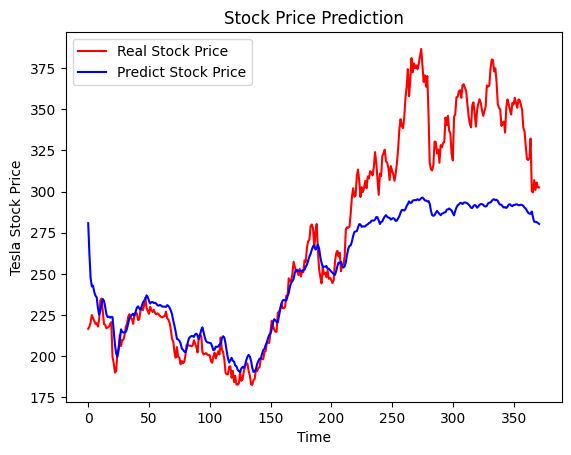

In [25]:
plt.plot(real_price, color = "red", label = "Real Stock Price")
plt.plot(predict, color = "blue", label = "Predict Stock Price")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Tesla Stock Price")
plt.legend()
plt.show()

# LSTM Model

In [26]:
from keras.layers import LSTM

In [27]:
regressor_l = Sequential()

regressor_l.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor_l.add(Dropout(0.2))

regressor_l.add(LSTM(units = 50, return_sequences = True))
regressor_l.add(Dropout(0.2))

regressor_l.add(LSTM(units = 50, return_sequences = True))
regressor_l.add(Dropout(0.2))

regressor_l.add(LSTM(units = 50))
regressor_l.add(Dropout(0.2))

regressor_l.add(Dense(units = 1))

# Compile Model

In [29]:
regressor_l.compile(optimizer= "adam", loss = "mean_squared_error")

In [30]:
regressor_l.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/100
73/73 [==============================] - 24s 90ms/step - loss: 0.0210
Epoch 2/100
73/73 [==============================] - 6s 88ms/step - loss: 0.0064
Epoch 3/100
73/73 [==============================] - 6s 86ms/step - loss: 0.0057
Epoch 4/100
73/73 [==============================] - 6s 88ms/step - loss: 0.0055
Epoch 5/100
73/73 [==============================] - 6s 87ms/step - loss: 0.0051
Epoch 6/100
73/73 [==============================] - 6s 87ms/step - loss: 0.0047
Epoch 7/100
73/73 [==============================] - 6s 88ms/step - loss: 0.0042
Epoch 8/100
73/73 [==============================] - 6s 87ms/step - loss: 0.0041
Epoch 9/100
73/73 [==============================] - 7s 89ms/step - loss: 0.0038
Epoch 10/100
73/73 [==============================] - 6s 87ms/step - loss: 0.0035
Epoch 11/100
73/73 [==============================] - 6s 87ms/step - loss: 0.0048
Epoch 12/100
73/73 [==============================] - 7s 92ms/step - loss: 0.0035
Epoch 13/100
73/73 [====

# Predict The LSTM

In [32]:
predict_l = regressor_l.predict(X_test)
predict_l = scaler.inverse_transform(predict_l)

12/12 [==============================] - 4s 32ms/step


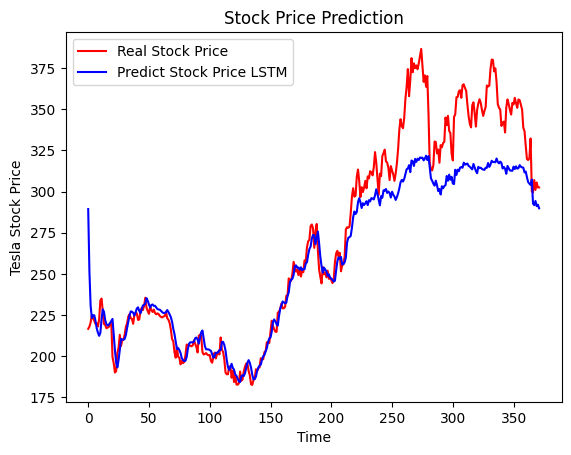

In [33]:
plt.plot(real_price, color = "red", label = "Real Stock Price")
plt.plot(predict_l, color = "blue", label = "Predict Stock Price LSTM")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Tesla Stock Price")
plt.legend()
plt.show()

# Comparison

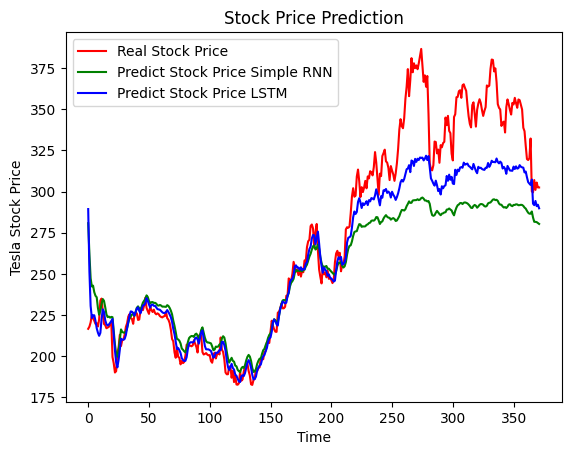

In [35]:
plt.plot(real_price, color = "red", label = "Real Stock Price")
plt.plot(predict, color = "green", label = "Predict Stock Price Simple RNN")
plt.plot(predict_l, color = "blue", label = "Predict Stock Price LSTM")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Tesla Stock Price")
plt.legend()
plt.show()